# Introduction to Geospatial Vector Data

This notebook contains simple code snippets with which the basic capabilities of [GeoPandas](https://geopandas.org/en/stable/) are shown.

Look at the companion guide: [`README.md`](../README.md).

Table of contents:

1. Introduction to Geospatial Vector Data
    - 1.1 Baic Visualization: Scatterplots with Background
    - 1.2 GeoPandas Basics
        - Convert CSV to GeoPandas
        - Grouping and Filtering
    - 1.3 Visualizing Spatial Data

## 1. Introduction to Geospatial Vector Data

The datasets are located here:

In [86]:
DATA_PATH_PARIS = '../../data/work_geodata/Paris/'

We have mainly two types of geodata:

- Raster: grid with values, e.g., altitude or images (RGB, heat, anything).
- Vector: points, lines and polygons.

The course focuses on vector data, i.e.,

- Points: `(x,y)` (e.g., cities on a map).
- Lines; `[(x,y), (x,y), (x,y), ...]` (e.g., rivers on a map).
- Polygons (and multipolygons): they close and contain an area (e.g., countries on a map).

### 1.1 Baic Visualization: Scatterplots with Background

In [2]:
import pandas as pd
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt

/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/site-packages/requests/__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning,
/Users/mxagar/opt/anaconda3/envs/ds/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
restaurants = pd.read_csv(DATA_PATH_PARIS+"paris_restaurants.csv")

In [9]:
restaurants.head()

,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


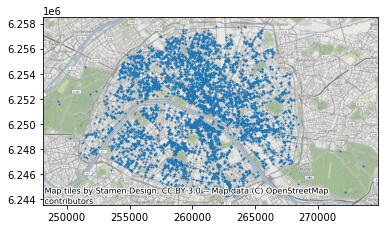

In [10]:
# To add a background map: contextily
# It automatically downloads the tile of the required region
# But the X & Y or Long & Lat need to be correct
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)

### 1.2 GeoPandas Basics

GeoPandas is an extension to Pandas which can contain geodata. It has always a `geometry` column, which contains often the polygons of given regions/areas. The rest of the columns are the attributes of the elements that represent those polygons.

Note that:

- The dataframes become of type `GeoDataFrame`. They have special properties and methods, like `plot()`, which nicely plots the geometries.
- The `geometry` column is of type `GeoSeries`, equivalent to the Pandas `Series`, but for geometrical data; it has several special attributes/properties, like `area`.

In [13]:
# Read the Paris districts dataset: GeoPackage file / GeoJSON file
districts = gpd.read_file(DATA_PATH_PARIS+'paris_districts_utm.geojson')

In [17]:
# Inspect the first rows
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


<AxesSubplot:>

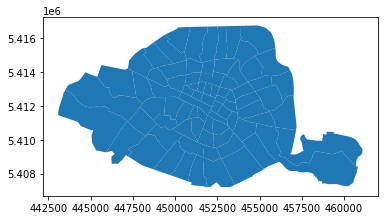

In [16]:
# Make a quick visualization of the districts
districts.plot()

In [18]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [19]:
type(districts.geometry)

geopandas.geoseries.GeoSeries

In [21]:
# Inspect the area of the districts
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

#### Convert CSV to GeoPandas

In [27]:
df = pd.read_csv(DATA_PATH_PARIS+"paris_restaurants.csv")

In [28]:
restaurants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

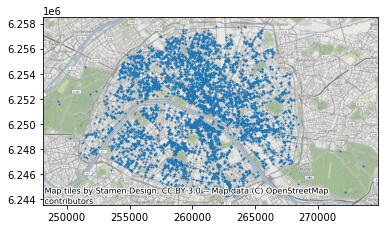

In [81]:
ax = restaurants.plot(markersize=1)
contextily.add_basemap(ax)

#### Grouping and Filtering

We can basically use any pandas/matplotlib functionality!

In [84]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


In [85]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type'] == 'African restaurant']

### 1.3 Visualizing Spatial Data

If we use `.plot()` on a `GeoDataFrame`, the `geometry` column will be plotted, i.e., the polygons contained in it. We can further control the plots:

- If we pass the `color` attribute, we can specify the color for all geometries.
- `column`: we specify the values of which other column should be plotted in the displayed polygons.
- `cmap`: [color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
- We can overlay other plot son the plotted polygons (e.g., scatterplots or points) by using the `ax` option.
- We can add a legend and control it passing a dictionary via `legend_kwds`.
- We can use any pandas and matplotlib functions, basically.


In [31]:
# Read the Paris districts dataset: GeoPackage file / GeoJSON file
districts = gpd.read_file(DATA_PATH_PARIS+'paris_districts_utm.geojson')

In [32]:
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [35]:
# Add a population density column
# Watch out: area is in m2, we want to pass it to km2 -> /10^6
districts['population_density'] = (districts.population / districts.geometry.area) * 10**6

<AxesSubplot:>

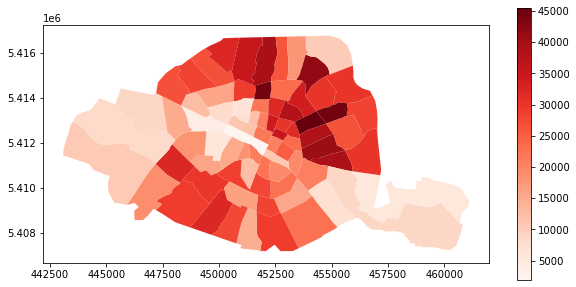

In [42]:
# Make a plot of the districts colored by the population density
districts.plot(column = 'population_density', cmap = 'Reds', legend=True, figsize=(10, 5))

In [71]:
df = pd.read_csv(DATA_PATH_PARIS+"paris_restaurants.csv")
restaurants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

In [72]:
restaurants.head()

,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (259641.692 6251867.063)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (259572.340 6252029.683)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (259684.438 6252203.137)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (259597.943 6252230.044)


In [73]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

In [74]:
type_counts

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64

In [76]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type'] == 'African restaurant']

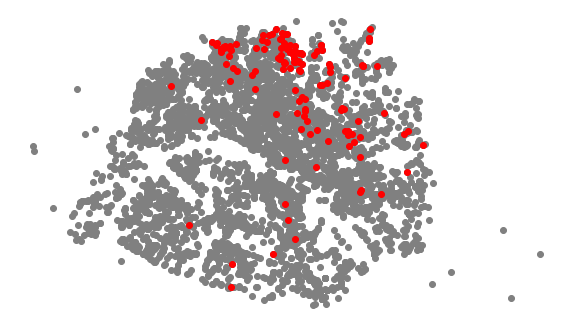

In [80]:
# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='grey')
african_restaurants.plot(ax=ax, color='red')
# Remove the box, ticks and labels
ax.set_axis_off()